## Student Information

Please enter the names and IDs of the two students below:

1. **Name**: [Enter Student 1 Name Here]  
   **ID**: `9XXXXXX`

2. **Name**: [Enter Student 2 Name Here]  
   **ID**: `9XXXXXX`


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities.


## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image.

1. Install Scikit-learn  
   Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.

```bash
pip install scikit-learn scikit-image
```


In [5]:
##Import all needed libraries
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io
import rasterio

"""
##The dataset is loaded to your GDrive so need to be mounted
from google.colab import drive
drive.mount('/content/drive')
"""

"\n##The dataset is loaded to your GDrive so need to be mounted\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

The PCA (Principal Component Analysis) algorithm, found within the `sklearn.decomposition` module, is widely utilized in machine learning for reducing the dimensionality of datasets. Its primary goal is to identify essential patterns or structures within the data.

In the realm of image processing, PCA serves to decrease the dimensionality of images by extracting a smaller set of features that capture the majority of the original data's variation. This becomes particularly beneficial as images often contain numerous pixels, posing challenges in data analysis and visualization.

Functioning by determining new coordinate systems that effectively encapsulate the data's variance, PCA identifies these coordinates as principal components. Each principal component sequentially captures varying degrees of data variance, enabling the reduction of data dimensionality while preserving significant information by retaining only the most informative principal components.


## R1- Apply PCA to RGB image

To implement PCA on an RGB image, the following steps are undertaken:

- **Convert the image to a 2D array of pixel values**: Begin by converting the RGB image into a two-dimensional array of pixel values. Each row of the array represents a pixel, and each column represents a color channel (R, G, B).

- **Scale the data to have zero mean and unit variance along each feature (channel) axis**: This step is crucial for ensuring that each color channel contributes equally to the PCA analysis. Scaling the data to have zero mean and unit variance along each feature axis helps in standardizing the range of values across different channels, preventing any single channel from dominating the analysis.

- **Perform PCA with 3 components using scikit-learn**: Utilize the scikit-learn library to perform Principal Component Analysis with three components. The choice of three components is made to retain sufficient information while reducing the dimensionality of the data. This decision aims to strike a balance between capturing significant variance and avoiding overfitting.

### Requirements

- Plot the Eigen Vectors in 3D.
- Remove the least significant principal component.
- Plot the most significant eigen vectors in 2D.
- State the percentage of variance covered and provide commentary on its significance.


In [12]:
def show_custom_plt(img_pca):
    
    # Create a new figure
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    # Plot scatter graph for the first pair of components
    axes[0].scatter(img_pca[:, 0], img_pca[:, 1])
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')
    axes[0].set_title('PC1 has higher variation')

    # Plot scatter graph for the second pair of components
    axes[1].scatter(img_pca[:, 1], img_pca[:, 2])
    axes[1].set_xlabel('PC2')
    axes[1].set_ylabel('PC3')
    axes[1].set_title('PC3 Has very Low variation')


    # Plot scatter graph for the third pair of components
    axes[2].scatter(img_pca[:, 0], img_pca[:,2])
    axes[2].set_xlabel('PC1')
    axes[2].set_ylabel('PC3')
    axes[2].set_title('PCA Transformed Pixel Values [2PCAs]')
    axes[2].set_title('PC3 Has very Low variation')


    # Add title to the entire figure
    fig.suptitle('PCA Transformed Pixel Values 2D Projection For Better Visualization', fontsize=16)

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

def check_orthonormal(v1,v2):
        
    # Dot product of v1 and v2
    dot_product = np.dot(v1, v2)

    # Check if the dot product is approximately zero
    if not np.isclose(dot_product, 0):
        print("The vectors are not orthogonal.")
        return

    # Length (magnitude) of v1 and v2
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)

    # Check if the lengths are approximately equal to 1
    if not np.isclose(magnitude_v1, 1) and np.isclose(magnitude_v2, 1):
        print("The vectors are not normalized.")
        return 
    print("The 2 vectors are orthonormal 😎")


def plt_images(image, img_pca):
    pass
    # # Create a figure with three subplots
    # fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # # Plot the original image on the first subplot
    # axes[0].imshow(image)
    # axes[0].set_title('Original Image (3 Bands)')
    # axes[0].axis('off')

    # # Plot the first principal component on the second subplot
    # axes[1].imshow(img_pca[:, :, 0], cmap='gray')
    # axes[1].set_title('First Principal Component')
    # axes[1].axis('off')

    # # Plot the second principal component on the third subplot
    # axes[2].imshow(img_pca[:, :, 1], cmap='gray')
    # axes[2].set_title('Second Principal Component')
    # axes[2].axis('off')

    # # Adjust layout and show the plot
    # plt.tight_layout()
    # plt.show()

Mean: [38.90722656 61.08911133 77.5871582 ] Variance [11.25701809 13.82628769  5.97677845]
[After Scaling]Mean: [-1.83392797e-15  7.50267903e-16  2.27742087e-15] Variance [1. 1. 1.]


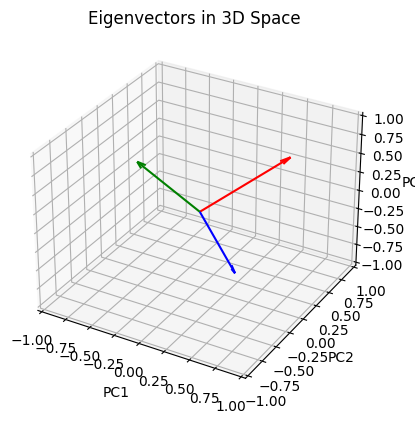

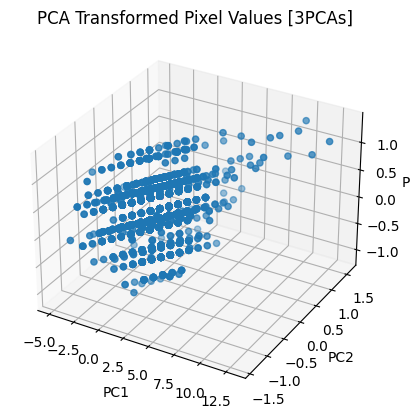

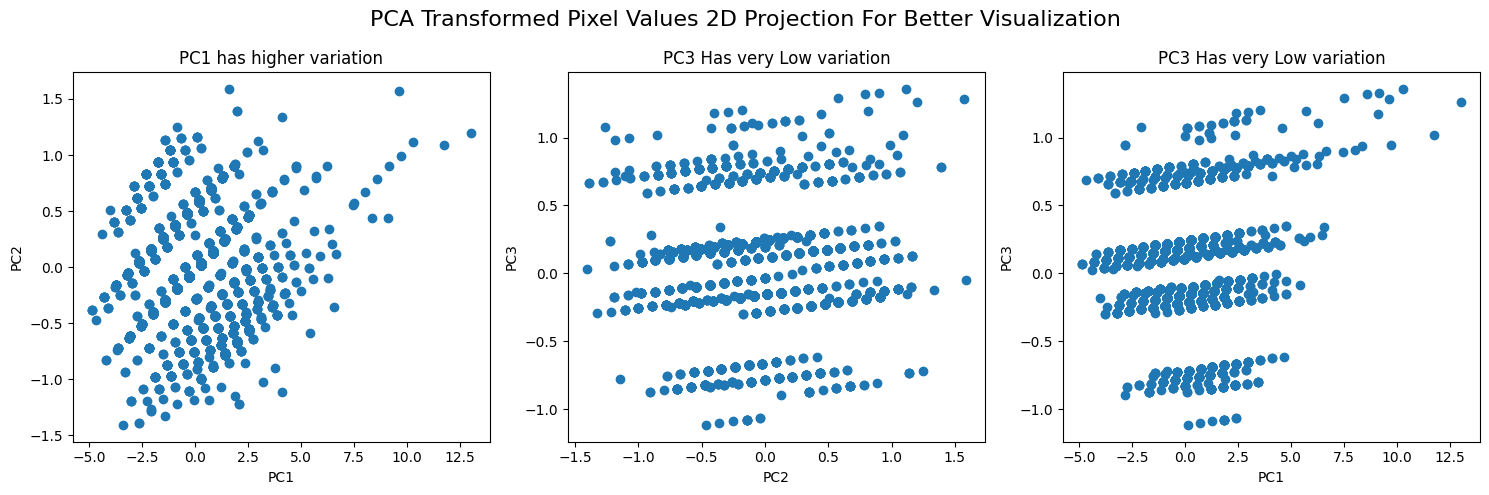

Variance Ratio
 [0.89004617 0.06451311 0.04544072]


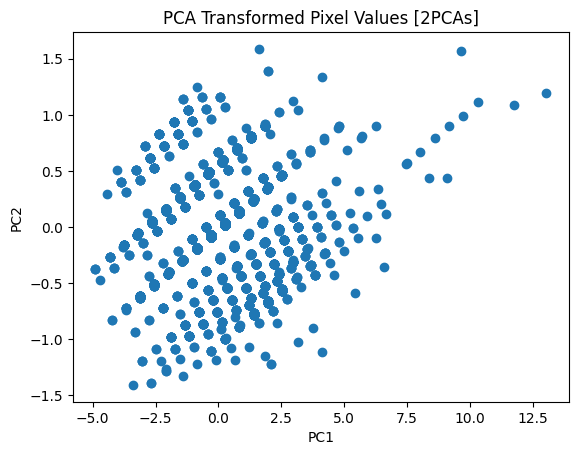

Covariance Matrix [Before PCA]:
 [[11.25976706 10.77432535  6.76120149]
 [10.77432535 13.82966407  7.43289066]
 [ 6.76120149  7.43289066  5.97823798]]
Covariance Matrix [After PCA]:
 [[2.67079057e+00 9.97275793e-16]
 [9.97275793e-16 1.93586583e-01]]
Correlation Matrix [Before PCA]:
 [[1.         0.86341496 0.82408608]
 [0.86341496 1.         0.81745778]
 [0.82408608 0.81745778 1.        ]]
Correlation Matrix [After PCA]:
 [[1.00000000e+00 1.38694019e-15]
 [1.38694019e-15 1.00000000e+00]]
Eigen Values [2.67079057 0.19358658 0.13635545]
Eigen Values[Ratios] [0.89004617 0.06451311 0.04544072]
Eigen Vectors [[ 0.58139025  0.57989717  0.57070539]
 [-0.35500143 -0.4503447   0.81924578]
 [ 0.73209245 -0.67890274 -0.0559617 ]]
Eigen Vectors[Reduced] [[ 0.58139025  0.57989717  0.57070539]
 [-0.35500143 -0.4503447   0.81924578]]
The 2 vectors are orthonormal 😎


In [13]:
# Requirement 1

# TODO: Load the JPG image "Forest_1.jpg"
image = io.imread('Forest_1.jpg')


# TODO: Convert the image to a 2D array of pixel values
image_array= image.reshape(-1, image.shape[-1]) # Each Channel is now column :D
# print(np.shape(image)) #(4096, 3)

# TODO: Scale the data to have zero mean and unit variance along each feature axis.
# Feature = Channel --> We will perform Scaling along each channel independently
scaler = StandardScaler()
scaled_image_array= scaler.fit_transform(image_array)

print("Mean:",image_array.mean(0),"Variance",image_array.var(0))
print("[After Scaling]Mean:",scaled_image_array.mean(0),"Variance",scaled_image_array.var(0))


# TODO: Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(scaled_image_array)

eigenvectors = pca.components_ # eigen vectors
eigenvalues=pca.explained_variance_
eigenvalues_ratios=pca.explained_variance_ratio_

# Apply the transformation learned on the image :D
img_pca=pca.transform(scaled_image_array) 


# TODO: Screen plot of the eigen vectors
# (1) Plot Eigen Vectors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, eigenvectors[0, 0], eigenvectors[0, 1], eigenvectors[0, 2],color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, eigenvectors[1, 0], eigenvectors[1, 1], eigenvectors[1, 2],color='g', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, eigenvectors[2, 0], eigenvectors[2, 1], eigenvectors[2, 2],color='b', arrow_length_ratio=0.1)

# Set plot labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Eigenvectors in 3D Space')

# Set axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show plot
plt.show()

# (2) Plot Scatter Diagram For the Transformed Image
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(img_pca[:, 0], img_pca[:, 1], img_pca[:, 2])

# Set plot labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Transformed Pixel Values [3PCAs]')

# Show plot
plt.show()

# (3) plot 3PCA but 2d to be more clear
show_custom_plt(img_pca)

# TODO: Remove the lowest unimportant PC
print("Variance Ratio\n",pca.explained_variance_ratio_)
# Remove Last one which is of the least ratio
eigenvectors_reduced = eigenvectors[0:2,:]


# (1) Plotter Scatter Graph for the transformed image after ignore the 3rd 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(img_pca[:, 0], img_pca[:, 1])

# Set plot labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Transformed Pixel Values [2PCAs]')

# Show plot
plt.show()


# # # TODO: Print the covariance matrix, eigen values, and eigen vectors and comment on the result.
print("Covariance Matrix [Before PCA]:\n",np.cov(image_array.T))
print("Covariance Matrix [After PCA]:\n",np.cov(img_pca[:,0:2].T))

print("Correlation Matrix [Before PCA]:\n",np.corrcoef(image_array.T))
print("Correlation Matrix [After PCA]:\n",np.corrcoef(img_pca[:,0:2].T))

print("Eigen Values",eigenvalues)
print("Eigen Values[Ratios]",eigenvalues_ratios)

print("Eigen Vectors",eigenvectors)
print("Eigen Vectors[Reduced]",eigenvectors_reduced)


# Extra Check Eigen Vectors are orthonormal ??!
check_orthonormal(v1=eigenvectors_reduced[0,:],v2=eigenvectors_reduced[1,:])


# Extra Show Image After Transformation [Failed]
plt_images(image,img_pca)



### Normalization Step
```
Mean: [38.90722656 61.08911133 77.5871582 ] Variance [11.25701809 13.82628769  5.97677845]
```
```
[After Scaling] Mean: [-1.83392797e-15  7.50267903e-16  2.27742087e-15] Variance [1. 1. 1.]
```
We have achieved Zero Mean and Vaiance of 1 But Why 🤔🤔🤔
A: PCA aims to find the directions (principal components) in which the data varies the most. If the features are on different scales or have different variances, this can lead to misleading results because PCA will tend to give more weight to features with larger variances.

### Covariance Matrices
##### Before PCA
```
 [[11.25976706 10.77432535  6.76120149]
 [10.77432535 13.82966407  7.43289066]
 [ 6.76120149  7.43289066  5.97823798]]
```
##### After PCA
```
 [[2.67079057e+00 9.97275793e-16]
 [9.97275793e-16 1.93586583e-01]]
```
It is clear the rgb channel at the beginning where positively correlated But the Values aren't meaning full for the corraltion value so i computed the correlation Matrix 
  
### Correlation Matrices
##### Before PCA
```
 [[1.         0.86341496 0.82408608]
 [0.86341496 1.         0.81745778]
 [0.82408608 0.81745778 1.        ]]
```
##### After PCA
```
 [[1.00000000e+00 1.38694019e-15]
 [1.38694019e-15 1.00000000e+00]]
```
It is clear the at the beginning the 3 bands where highly correlated after PCA we reached Zero Correlation 😉😉


### Eigen Values
```
[2.67079057 0.19358658 0.13635545]
```
###  Eigen Values [Ratios]
```
[0.89004617 0.06451311 0.04544072]
```

It is clear that the first eigen value is the greatest one this means that the first PCA(First Channel in the new system) has 89% significancy while the last channel is the least so when we dropped we dropped the last channel :D

### Eigen Vectors
#### 3PCAs
```
[[ 0.58139025  0.57989717  0.57070539]
[-0.35500143 -0.4503447   0.81924578]
[ 0.73209245 -0.67890274 -0.0559617 ]]
```
#### The most 2 significant
```
[[ 0.58139025  0.57989717  0.57070539]
 [-0.35500143 -0.4503447   0.81924578]]
```
#### 2. Eigen Vectors are 3 each of shape 3
when you apply PCA to these flattened vectors, each eigenvector (or principal component) corresponds to a direction in the RGB color space, and each principal component will be a vector of size 3. Each element of this vector represents the weight or importance of the corresponding color channel (red, green, or blue) in that direction.

The Eigen Vectors are orthonormal :D 🔥🔥

## R2- Apply PCA to satellite image

To implement PCA on a satellite image, the same afromentioned steps are undertaken:

### Requirements

- Apply PCA without loss.
- Show the covariance matrix.
- Show the Eigen Values and Vectors.
- Choose the three most significant axis.
- Plot the most significant eigen vectors in 3D.
- State the percentage of variance covered and provide commentary on its significance.
- Q: What can be achieved now by the transformed image?


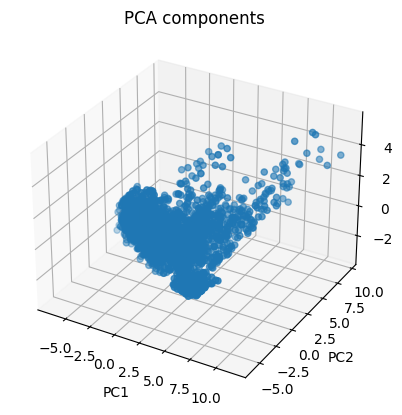

Covariance matrix: 
 [[0.93840121 0.63091511 0.65598255 0.64691093 0.78957246 0.36010965
  0.27210328 0.2366361  0.45529603 0.57970124 0.79686535 0.80889365
  0.34285192]
 [0.63091511 1.00540726 0.850764   0.8812876  0.78823154 0.26838506
  0.17154226 0.20821166 0.28498211 0.1252201  0.76116362 0.82041565
  0.23395357]
 [0.65598255 0.850764   1.0151976  0.83001227 0.84703589 0.4877118
  0.39888659 0.41014119 0.47142666 0.14447658 0.82866109 0.82676197
  0.45696829]
 [0.64691093 0.8812876  0.83001227 1.03099659 0.77289582 0.16990416
  0.06800772 0.11143022 0.21120519 0.16141062 0.74418009 0.83129769
  0.13459711]
 [0.78957246 0.78823154 0.84703589 0.77289582 1.03269667 0.55453844
  0.46349868 0.44077385 0.57864883 0.38203737 0.90017344 0.87807263
  0.53007561]
 [0.36010965 0.26838506 0.4877118  0.16990416 0.55453844 1.0838156
  0.944591   0.86205303 0.83519825 0.12793459 0.57674918 0.36655969
  0.95404057]
 [0.27210328 0.17154226 0.39888659 0.06800772 0.46349868 0.944591
  1.07732051 0.

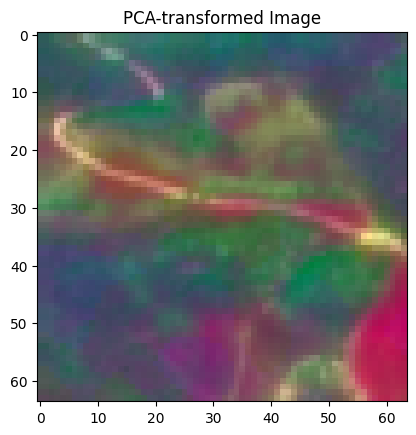

In [9]:
# Requirement 2

# TODO: Load the TIF image "Forest_27.tif"
with rasterio.open("./Forest_27.tif") as img:

    # TODO: Convert the channel to a 2D array of pixel values
    img_2d = img.read(1)
    img_2d = img_2d.reshape(-1, 1)
    for i in range(2, img.count + 1):
        img_2d = np.concatenate((img_2d, img.read(i).reshape(-1, 1)), axis=1)

    # TODO: Scale the data to have zero mean and unit variance along each feature axis.
    scaler = StandardScaler()
    scaler.fit(img_2d)
    img_scaled = scaler.transform(img_2d)

    # # TODO: Perform PCA
    pca = PCA(n_components=3)
    pca.fit(img_scaled)
    img_pca = pca.transform(img_scaled)
    # # TODO: Keep the 3 most significant PCs
    # # TODO: Plot the graph of the PCA vectors
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(img_pca[:, 0], img_pca[:, 1], img_pca[:, 2])
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.title("PCA components")
    plt.show()
    print(
        "Covariance matrix: \n",
        pca.get_covariance(),
        "\nEigenvalues: \n",
        pca.explained_variance_,
        "\nEigenvectors: \n",
        pca.components_,
    )

    img_pca = img_pca.reshape(*img.shape[:2], 3)
    pca_image_normalized = (img_pca - np.min(img_pca)) / (
        np.max(img_pca) - np.min(img_pca)
    )
    plt.title("PCA-transformed Image")

    plt.imshow(pca_image_normalized)

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
